In [1]:
%matplotlib inline 

import glob
import os
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
DATA_DIR = os.path.join('../data')
SAMPLE_RUN = os.path.join(DATA_DIR, 'sample-data', 'driving_log.csv')
TEST_RUN = os.path.join(DATA_DIR, 'new-data', 'run1', 'driving_log.csv')

In [5]:
sample_run = pd.read_csv(SAMPLE_RUN)
# test_run = pd.read_csv(TEST_RUN, header=0)

In [5]:
test_run.columns = sample_run.columns

In [6]:
sample_run.columns

Index(['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'], dtype='object')

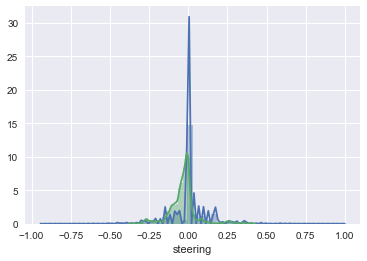

In [7]:
ax = sns.distplot(sample_run['steering'])
sns.distplot(test_run['steering'])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


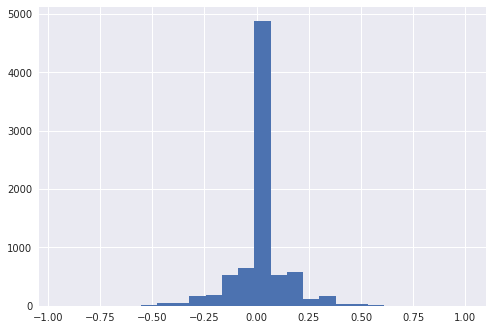

In [6]:
sample_run['steering'].hist(bins=25)

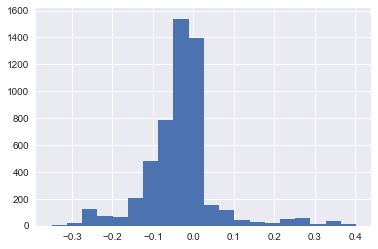

In [9]:
test_run['steering'].hist(bins=20)

In [10]:
test_run.shape

(5238, 7)

In [11]:
sample_run.shape

(8036, 7)

In [12]:
steering_hist = np.histogram(test_run['steering'], bins=20)

In [13]:
steering_hist

(array([   9,   21,  125,   75,   65,  207,  484,  789, 1539, 1393,  157,
         117,   46,   26,   18,   50,   55,   15,   32,   15]),
 array([-0.35      , -0.31242519, -0.27485038, -0.23727557, -0.19970076,
        -0.16212595, -0.12455114, -0.08697633, -0.04940152, -0.01182671,
         0.0257481 ,  0.06332291,  0.10089772,  0.13847253,  0.17604734,
         0.21362215,  0.25119696,  0.28877177,  0.32634658,  0.36392139,
         0.4014962 ]))

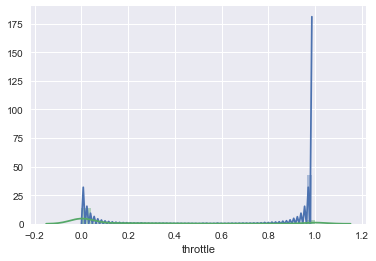

In [14]:
ax = sns.distplot(sample_run['throttle'])
sns.distplot(test_run['throttle'])

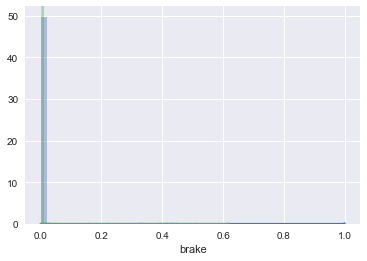

In [15]:
ax = sns.distplot(sample_run['brake'])
sns.distplot(test_run['brake'])

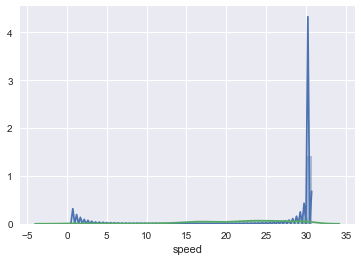

In [16]:
ax = sns.distplot(sample_run['speed'])
sns.distplot(test_run['speed'])

In [32]:
steering_hist = np.histogram(sample_run['steering'], bins=20)

In [33]:
steering_hist

(array([   4,    2,    3,    4,   21,   80,  180,  214,  811, 4956,  693,
         712,  176,  128,   38,    6,    5,    1,    0,    2]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]))

In [35]:
angles = np.hstack((sample_run['steering'], -sample_run['steering']))

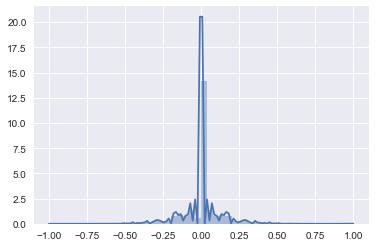

In [36]:
ax = sns.distplot(angles)

In [39]:
steering_hist = np.histogram(angles, bins=20)
steering_hist

(array([    6,     1,     3,    11,    23,   104,   250,   461,  1254,
         1562, 10284,  1254,   461,   250,   104,    23,    11,     3,
            1,     6]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [41]:
p = 1 - steering_hist[0]/(len(angles)*1.0)
p

array([ 0.99962668,  0.99993778,  0.99981334,  0.99931558,  0.99856894,
        0.99352912,  0.984445  ,  0.97131658,  0.92197611,  0.90281234,
        0.36012942,  0.92197611,  0.97131658,  0.984445  ,  0.99352912,
        0.99856894,  0.99931558,  0.99981334,  0.99993778,  0.99962668])

In [45]:
128//20

6

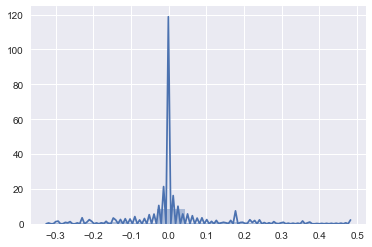

In [48]:
rsmpl = np.random.choice(angles, 128)
sns.distplot(rsmpl)

In [217]:
count, bins = np.histogram(angles, bins=25)

In [219]:
p = 1 - count/(np.sum(count))

keep_prob = []
for angle in angles:
    for i in range(len(count)):
        if bins[i] < angle <= bins[i+1]:
            keep_prob.append(p[i])

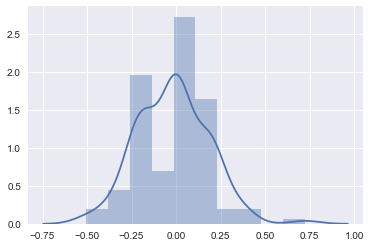

In [220]:
rsmpl = np.random.choice(angles, 128, keep_prob)
sns.distplot(rsmpl)

(array([  2.,   2.,   6.,  35.,  16.,  28.,   8.,  29.,   1.,   1.]),
 array([-0.6550089 , -0.53366957, -0.41233024, -0.29099091, -0.16965158,
        -0.04831225,  0.07302708,  0.19436641,  0.31570574,  0.43704507,
         0.5583844 ]),
 <a list of 10 Patch objects>)

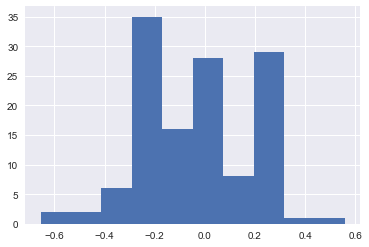

In [221]:
rsmpl = np.random.choice(angles, 128, keep_prob)
plt.hist(rsmpl)

(array([  2.,  11.,  27.,  13.,  28.,   8.,  30.,   7.,   1.,   1.]),
 array([-0.4863848 , -0.37379317, -0.26120154, -0.14860991, -0.03601828,
         0.07657335,  0.18916498,  0.30175661,  0.41434824,  0.52693987,
         0.6395315 ]),
 <a list of 10 Patch objects>)

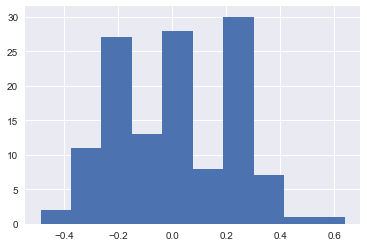

In [222]:
plt.hist(np.random.choice(angles, 128))

In [62]:
buckets = dict()
for angle in angles:
    for i in range(len(count)):
        if bins[i] < angle <= bins[i+1]:
            examples = buckets.get(bins[i], list())
            examples.append(angle)
            buckets[bins[i]] = examples

In [63]:
buckets.keys()

dict_keys([-0.099999999999999978, 0.0, -0.90000000000000002, 0.60000000000000009, 0.90000000000000013, 0.10000000000000009, -0.80000000000000004, -1.0, 0.70000000000000018, -0.69999999999999996, -0.39999999999999991, -0.59999999999999998, 0.30000000000000004, 0.40000000000000013, 0.20000000000000018, 0.80000000000000004, 0.5, -0.19999999999999996, -0.29999999999999993, -0.5])

In [65]:
128/len(buckets)

6.4

(array([ 14.,  14.,  10.,  10.,  13.,  12.,  13.,  11.,  11.,  12.]),
 array([-0.9426954 , -0.74842586, -0.55415632, -0.35988678, -0.16561724,
         0.0286523 ,  0.22292184,  0.41719138,  0.61146092,  0.80573046,  1.        ]),
 <a list of 10 Patch objects>)

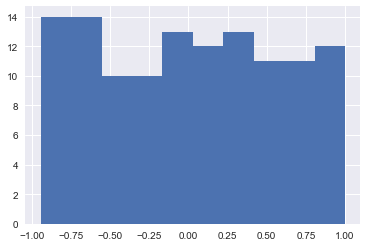

In [66]:
rsmpl = []
for k,v in buckets.items():
    rsmpl.extend(np.random.choice(v, 6))
    
plt.hist(rsmpl)

In [75]:
np.random.choice(2, 2)

array([0, 1])

In [7]:
angles = np.hstack((sample_run['steering'], sample_run['steering']+0.2, sample_run['steering']-0.2, 
                    -sample_run['steering'], -sample_run['steering']-0.2, -sample_run['steering']+0.2))

(array([  6.00000000e+00,   1.00000000e+00,   9.00000000e+00,
          9.00000000e+00,   2.10000000e+01,   9.50000000e+01,
          1.93000000e+02,   4.71000000e+02,   1.25400000e+03,
          2.01100000e+03,   1.09930000e+04,   3.31600000e+03,
          1.14580000e+04,   3.31600000e+03,   1.09930000e+04,
          2.01100000e+03,   1.25400000e+03,   4.71000000e+02,
          1.93000000e+02,   9.50000000e+01,   2.10000000e+01,
          9.00000000e+00,   9.00000000e+00,   1.00000000e+00,
          6.00000000e+00]),
 array([-1.2  , -1.104, -1.008, -0.912, -0.816, -0.72 , -0.624, -0.528,
        -0.432, -0.336, -0.24 , -0.144, -0.048,  0.048,  0.144,  0.24 ,
         0.336,  0.432,  0.528,  0.624,  0.72 ,  0.816,  0.912,  1.008,
         1.104,  1.2  ]),
 <a list of 25 Patch objects>)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


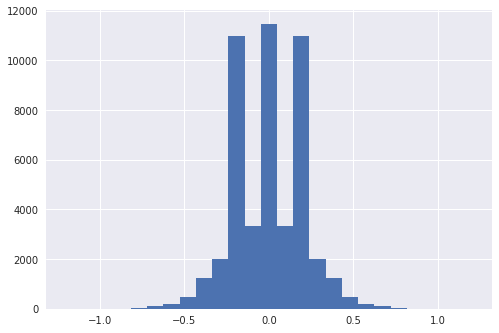

In [8]:
plt.hist(angles, bins=25)

In [9]:
counts, bins = np.histogram(angles, bins=25)

In [10]:
a = 1/counts
a

array([  1.66666667e-01,   1.00000000e+00,   1.11111111e-01,
         1.11111111e-01,   4.76190476e-02,   1.05263158e-02,
         5.18134715e-03,   2.12314225e-03,   7.97448166e-04,
         4.97265042e-04,   9.09669790e-05,   3.01568154e-04,
         8.72752662e-05,   3.01568154e-04,   9.09669790e-05,
         4.97265042e-04,   7.97448166e-04,   2.12314225e-03,
         5.18134715e-03,   1.05263158e-02,   4.76190476e-02,
         1.11111111e-01,   1.11111111e-01,   1.00000000e+00,
         1.66666667e-01])

In [11]:
-np.log(np.random.uniform())/counts

array([  7.39767127e-02,   4.43860276e-01,   4.93178085e-02,
         4.93178085e-02,   2.11362036e-02,   4.67221344e-03,
         2.29979418e-03,   9.42378506e-04,   3.53955563e-04,
         2.20716199e-04,   4.03766284e-05,   1.33854124e-04,
         3.87380238e-05,   1.33854124e-04,   4.03766284e-05,
         2.20716199e-04,   3.53955563e-04,   9.42378506e-04,
         2.29979418e-03,   4.67221344e-03,   2.11362036e-02,
         4.93178085e-02,   4.93178085e-02,   4.43860276e-01,
         7.39767127e-02])

In [177]:
for c,b in zip(counts, bins[:-1]):
    print(c, b)

11458.0 0.0
3554.0 0.048
3078.0 0.096
3044.0 0.144
18942.0 0.192
2368.0 0.24
1654.0 0.288
1884.0 0.336
624.0 0.384
470.0 0.432
472.0 0.48
238.0 0.528
148.0 0.576
122.0 0.624
68.0 0.672
18.0 0.72
24.0 0.768
14.0 0.816
4.0 0.864
12.0 0.912
6.0 0.96
2.0 1.008
0.0 1.056
8.0 1.104
4.0 1.152


In [225]:
def random_sheer(angle, shear_range=100):
    rows,cols,ch = 160, 320, 1
    dx = np.random.randint(-shear_range,shear_range+1)
    #    print('dx',dx)
    random_point = [cols/2+dx,rows/2]
    dsteering = dx/(rows/2) * 360/(2*np.pi*25.0) / 6.0
    angle +=dsteering
    return angle

In [12]:
rsmpl = []
while len(rsmpl) < 128:
    z = np.random.choice(angles)
    if np.absolute(z) < 0.1:
        if np.random.uniform() < 0.2:
            rsmpl.append(z)
    elif 0.15 < np.absolute(z) < 0.3:
        if np.random.uniform() < 0.2:
            rsmpl.append(z)
    else:
        rsmpl.append(z)

(array([  2.,   0.,   2.,   1.,   5.,   9.,   2.,   2.,  12.,  10.,   2.,
          3.,  17.,   3.,  13.,   7.,  17.,   5.,   3.,   6.,   1.,   0.,
          1.,   4.,   1.]),
 array([-0.606227  , -0.55619787, -0.50616874, -0.45613962, -0.40611049,
        -0.35608136, -0.30605223, -0.2560231 , -0.20599398, -0.15596485,
        -0.10593572, -0.05590659, -0.00587746,  0.04415166,  0.09418079,
         0.14420992,  0.19423905,  0.24426818,  0.2942973 ,  0.34432643,
         0.39435556,  0.44438469,  0.49441382,  0.54444294,  0.59447207,
         0.6445012 ]),
 <a list of 25 Patch objects>)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


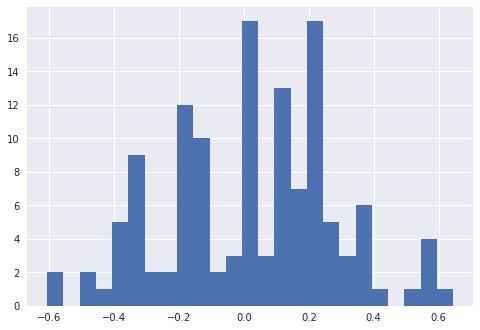

In [13]:
plt.hist(rsmpl, bins=25)

In [ ]:
def trans_image(image,steer,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,steer_ang